## **Installation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

## **Data Import**

In [2]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

## **SG Section**

In [3]:
print(f'There are {len(df["player_id"].unique())} players')

There are 30 players


In [4]:
shot_1 = df.loc[df['shot'] == 1]
avg_round = shot_1.groupby(['player_id', 'round','hole']).agg({'hole_score': 'sum'}).reset_index()
avg_round

,player_id,round,hole,hole_score
0,1810,1,1,4
1,1810,1,2,2
2,1810,1,3,4
3,1810,1,4,4
4,1810,1,5,5
...,...,...,...,...
2155,33141,4,14,3
2156,33141,4,15,4
2157,33141,4,16,4
2158,33141,4,17,5


In [5]:
sg_calc = avg_round.groupby(['hole','round'])['hole_score'].mean().reset_index()
sg_calc.rename(columns={'hole_score': 'sg_per_hole'}, inplace=True)
sg_calc

,hole,round,sg_per_hole
0,1,1,3.833333
1,1,2,4.033333
2,1,3,4.166667
3,1,4,4.000000
4,2,1,3.066667
...,...,...,...
67,17,4,4.300000
68,18,1,2.900000
69,18,2,3.066667
70,18,3,3.166667


In [6]:
selected_columns = ['player_id', 'last_name', 'round','hole','hole_score','par_value','yardage']  # Add the column names you want to select
condensed_df = shot_1[selected_columns].copy()
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage
0,1810,Mickelson,1,1,4,4,424
4,1810,Mickelson,1,2,2,3,214
6,1810,Mickelson,1,3,4,4,387
10,1810,Mickelson,1,4,4,4,440
14,1810,Mickelson,1,5,5,4,520
...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442
8406,33141,Bradley,4,15,4,5,525
8410,33141,Bradley,4,16,4,4,481
8414,33141,Bradley,4,17,5,4,470


In [7]:
import pandas as pd

# Assuming sg_calc and condensed_df are your DataFrames
condensed_df['sg_difference'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'sg_per_hole'].iloc[0] - row['hole_score'],
    axis=1
)

condensed_df['sg_per_hole'] = condensed_df.apply(
    lambda row: sg_calc.loc[(sg_calc['round'] == row['round']) & (sg_calc['hole'] == row['hole']), 'sg_per_hole'].iloc[0],
    axis=1
)

# Display the resulting DataFrame
condensed_df


,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole
0,1810,Mickelson,1,1,4,4,424,-0.166667,3.833333
4,1810,Mickelson,1,2,2,3,214,1.066667,3.066667
6,1810,Mickelson,1,3,4,4,387,-0.033333,3.966667
10,1810,Mickelson,1,4,4,4,440,-0.233333,3.766667
14,1810,Mickelson,1,5,5,4,520,-0.766667,4.233333
...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,0.766667,3.766667
8406,33141,Bradley,4,15,4,5,525,0.366667,4.366667
8410,33141,Bradley,4,16,4,4,481,0.166667,4.166667
8414,33141,Bradley,4,17,5,4,470,-0.700000,4.300000


# Strokes gained sanity check

In [8]:
sg_calc.iloc[:20,:]

,hole,round,sg_per_hole
0,1,1,3.833333
1,1,2,4.033333
2,1,3,4.166667
3,1,4,4.000000
4,2,1,3.066667
5,2,2,3.266667
6,2,3,2.866667
7,2,4,3.100000
8,3,1,3.966667
9,3,2,3.866667


In [9]:
condensed_df[['round','hole','hole_score','sg_per_hole','sg_difference','par_value']].iloc[:20,:]


,round,hole,hole_score,sg_per_hole,sg_difference,par_value
0,1,1,4,3.833333,-0.166667,4
4,1,2,2,3.066667,1.066667,3
6,1,3,4,3.966667,-0.033333,4
10,1,4,4,3.766667,-0.233333,4
14,1,5,5,4.233333,-0.766667,4
19,1,6,3,3.333333,0.333333,3
22,1,7,4,4.100000,0.100000,4
26,1,8,4,3.800000,-0.200000,4
30,1,9,5,4.766667,-0.233333,5
35,1,10,4,4.066667,0.066667,4


# Append Sci Pi normal fit!

In [10]:
condensed_df

,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole
0,1810,Mickelson,1,1,4,4,424,-0.166667,3.833333
4,1810,Mickelson,1,2,2,3,214,1.066667,3.066667
6,1810,Mickelson,1,3,4,4,387,-0.033333,3.966667
10,1810,Mickelson,1,4,4,4,440,-0.233333,3.766667
14,1810,Mickelson,1,5,5,4,520,-0.766667,4.233333
...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,0.766667,3.766667
8406,33141,Bradley,4,15,4,5,525,0.366667,4.366667
8410,33141,Bradley,4,16,4,4,481,0.166667,4.166667
8414,33141,Bradley,4,17,5,4,470,-0.700000,4.300000


# add rolling sg here by player

In [12]:
condensed_df = condensed_df.sort_values(by=['player_id', 'round', 'hole'])

# Calculate the rolling sum for each 'player_id'
condensed_df['rolling_sum_sg_difference'] = condensed_df.groupby('player_id')['sg_difference'].rolling(window=72, min_periods=1).sum().reset_index(level=0, drop=True)

,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole,rolling_sum_sg_difference
0,1810,Mickelson,1,1,4,4,424,-0.166667,3.833333,-0.166667
4,1810,Mickelson,1,2,2,3,214,1.066667,3.066667,0.900000
6,1810,Mickelson,1,3,4,4,387,-0.033333,3.966667,0.866667
10,1810,Mickelson,1,4,4,4,440,-0.233333,3.766667,0.633333
14,1810,Mickelson,1,5,5,4,520,-0.766667,4.233333,-0.133333
...,...,...,...,...,...,...,...,...,...,...
8403,33141,Bradley,4,14,3,4,442,0.766667,3.766667,2.266667
8406,33141,Bradley,4,15,4,5,525,0.366667,4.366667,2.633333
8410,33141,Bradley,4,16,4,4,481,0.166667,4.166667,2.800000
8414,33141,Bradley,4,17,5,4,470,-0.700000,4.300000,2.100000


In [14]:
condensed_df.iloc[60:80,:]

,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole,rolling_sum_sg_difference
6325,1810,Mickelson,4,7,4,4,434,0.133333,4.133333,4.333333
6329,1810,Mickelson,4,8,4,4,405,0.000000,4.000000,4.333333
6333,1810,Mickelson,4,9,5,5,600,-0.266667,4.733333,4.066667
6338,1810,Mickelson,4,10,4,4,469,0.233333,4.233333,4.300000
6342,1810,Mickelson,4,11,3,3,197,0.166667,3.166667,4.466667
6345,1810,Mickelson,4,12,5,4,391,-0.966667,4.033333,3.500000
6350,1810,Mickelson,4,13,4,4,476,0.000000,4.000000,3.500000
6354,1810,Mickelson,4,14,4,4,442,-0.233333,3.766667,3.266667
6358,1810,Mickelson,4,15,4,5,525,0.366667,4.366667,3.633333
6362,1810,Mickelson,4,16,5,4,481,-0.833333,4.166667,2.800000


In [15]:
# Create a new column 'round_hole_combination' with a numeric value representing the combination of 'round' and 'hole'
condensed_df['round_hole_combination'] = (condensed_df['round'] - 1) * 18 + condensed_df['hole']
condensed_df.iloc[60:80,:]
# Now condensed_df contains a new column 'round_hole_combination' representing the combination of 'round' and 'hole' as a numeric value ranging from 1 to 72.


,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole,rolling_sum_sg_difference,round_hole_combination
6325,1810,Mickelson,4,7,4,4,434,0.133333,4.133333,4.333333,61
6329,1810,Mickelson,4,8,4,4,405,0.000000,4.000000,4.333333,62
6333,1810,Mickelson,4,9,5,5,600,-0.266667,4.733333,4.066667,63
6338,1810,Mickelson,4,10,4,4,469,0.233333,4.233333,4.300000,64
6342,1810,Mickelson,4,11,3,3,197,0.166667,3.166667,4.466667,65
6345,1810,Mickelson,4,12,5,4,391,-0.966667,4.033333,3.500000,66
6350,1810,Mickelson,4,13,4,4,476,0.000000,4.000000,3.500000,67
6354,1810,Mickelson,4,14,4,4,442,-0.233333,3.766667,3.266667,68
6358,1810,Mickelson,4,15,4,5,525,0.366667,4.366667,3.633333,69
6362,1810,Mickelson,4,16,5,4,481,-0.833333,4.166667,2.800000,70


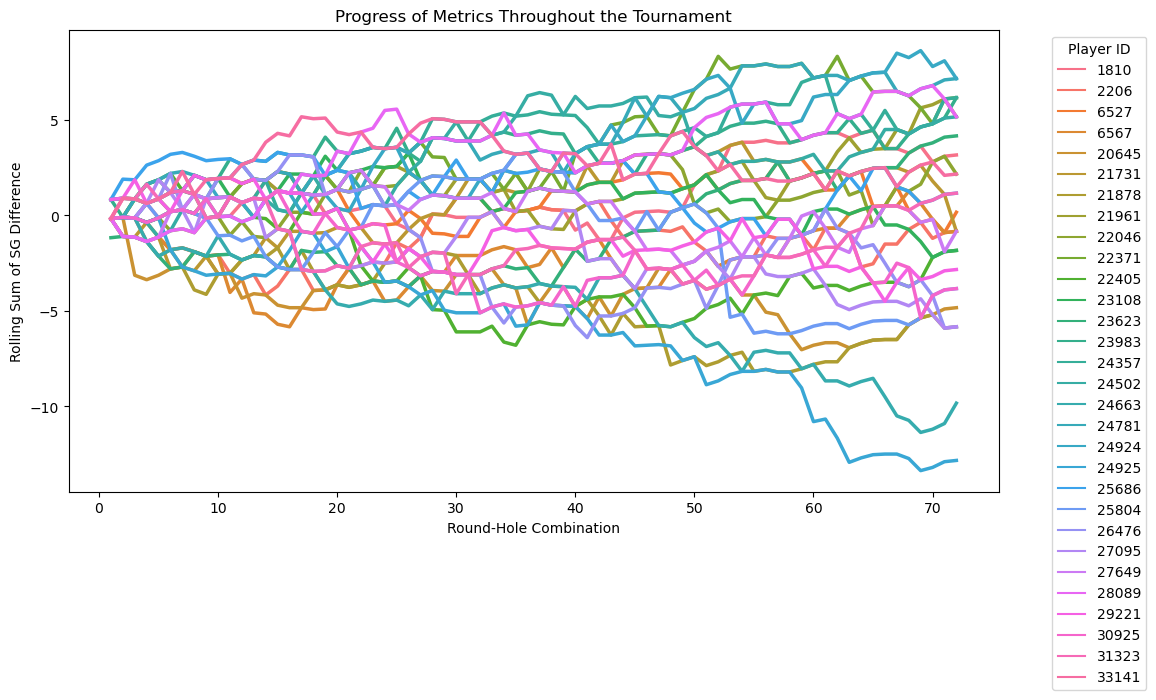

In [22]:
palette = sns.color_palette("husl", n_colors=len(condensed_df['player_id'].unique()))

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=condensed_df, x='round_hole_combination', y='rolling_sum_sg_difference', hue='player_id', palette=palette, linewidth=2.5)

# Set labels and title
plt.xlabel('Round-Hole Combination')
plt.ylabel('Rolling Sum of SG Difference')
plt.title('Progress of Metrics Throughout the Tournament')

# Customize the legend to show more players
plt.legend(title='Player ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [29]:
condensed_df_temp = condensed_df.sort_values(by='round_hole_combination')
condensed_df_temp

,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole,rolling_sum_sg_difference,round_hole_combination
0,1810,Mickelson,1,1,4,4,424,-0.166667,3.833333,-0.166667,1
1254,24924,Haas,1,1,4,4,424,-0.166667,3.833333,-0.166667,1
1597,27095,Watney,1,1,4,4,424,-0.166667,3.833333,-0.166667,1
706,22405,Rose,1,1,4,4,424,-0.166667,3.833333,-0.166667,1
357,21731,Jacobson,1,1,4,4,424,-0.166667,3.833333,-0.166667,1
...,...,...,...,...,...,...,...,...,...,...,...
8069,27649,Snedeker,4,18,2,3,235,1.066667,3.066667,-0.833333,72
8138,28089,Day,4,18,4,3,235,-0.933333,3.066667,5.166667,72
8213,29221,Simpson,4,18,3,3,235,0.066667,3.066667,-2.833333,72
7286,23983,Donald,4,18,2,3,235,1.066667,3.066667,6.166667,72


In [34]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Assuming you have a DataFrame named condensed_df with the necessary columns

# Create a Bokeh figure
p = figure(title='Progress of Metrics Throughout the Tournament',
           x_axis_label='Round-Hole Combination', y_axis_label='Rolling Sum of SG Difference')

# Create a ColumnDataSource
source = ColumnDataSource(condensed_df_temp)

# Plot lines with different colors for each player_id
p.line(x='round_hole_combination', y='rolling_sum_sg_difference', line_width=1, line_color='blue', legend_field='player_id', source=source)

# Customize the legend
p.legend.title = 'Player ID'

# Show the plot
show(p)


In [20]:
condensed_df.player_id.value_counts()

player_id
1810     72
2206     72
31323    72
30925    72
29221    72
28089    72
27649    72
27095    72
26476    72
25804    72
25686    72
24925    72
24924    72
24781    72
24663    72
24502    72
24357    72
23983    72
23623    72
23108    72
22405    72
22371    72
22046    72
21961    72
21878    72
21731    72
20645    72
6567     72
6527     72
33141    72
Name: count, dtype: int64

## another sanoty check

In [11]:
condensed_df.iloc[0:9,:]

,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole
0,1810,Mickelson,1,1,4,4,424,-0.166667,3.833333
4,1810,Mickelson,1,2,2,3,214,1.066667,3.066667
6,1810,Mickelson,1,3,4,4,387,-0.033333,3.966667
10,1810,Mickelson,1,4,4,4,440,-0.233333,3.766667
14,1810,Mickelson,1,5,5,4,520,-0.766667,4.233333
19,1810,Mickelson,1,6,3,3,209,0.333333,3.333333
22,1810,Mickelson,1,7,4,4,434,0.100000,4.100000
26,1810,Mickelson,1,8,4,4,405,-0.200000,3.800000
30,1810,Mickelson,1,9,5,5,600,-0.233333,4.766667


In [12]:
condensed_df.iloc[18:27,:]

,player_id,last_name,round,hole,hole_score,par_value,yardage,sg_difference,sg_per_hole
68,2206,Toms,1,1,4,4,424,-0.166667,3.833333
72,2206,Toms,1,2,3,3,214,0.066667,3.066667
75,2206,Toms,1,3,4,4,387,-0.033333,3.966667
79,2206,Toms,1,4,5,4,440,-1.233333,3.766667
84,2206,Toms,1,5,4,4,520,0.233333,4.233333
88,2206,Toms,1,6,4,3,209,-0.666667,3.333333
92,2206,Toms,1,7,4,4,434,0.100000,4.100000
96,2206,Toms,1,8,4,4,405,-0.200000,3.800000
100,2206,Toms,1,9,5,5,600,-0.233333,4.766667


In [13]:
list_of_sg_differences = []

for _, row in condensed_df.iterrows():
    list_of_sg_differences = condensed_df[
        (condensed_df['round'] == 1) & (condensed_df['hole'] == 2)]['sg_difference'].values

In [14]:
list_of_sg_differences

array([ 1.06666667,  0.06666667,  0.06666667, -0.93333333,  0.06666667,
       -0.93333333, -0.93333333,  0.06666667,  0.06666667,  0.06666667,
        0.06666667,  0.06666667,  0.06666667, -0.93333333,  0.06666667,
        0.06666667,  0.06666667,  0.06666667,  0.06666667,  0.06666667,
        1.06666667,  0.06666667,  0.06666667,  0.06666667, -0.93333333,
       -0.93333333,  0.06666667,  0.06666667,  1.06666667,  1.06666667])

In [15]:
list_of_sg_differences.mean()

2.0724163126336256e-16

In [16]:
import scipy.stats as stats

list_of_lists_sg_differences = []
results_list = []

for round_num in range(1, 5):  # Assuming rounds range from 1 to 4
    for hole_num in range(1, 19):  # Assuming holes range from 1 to 18
        list_of_sg_differences = condensed_df[
            (condensed_df['round'] == round_num) & (condensed_df['hole'] == hole_num)
        ]['sg_difference'].values.tolist()
        
        params = stats.norm.fit(list_of_sg_differences)
        
        result_dict = {
            'round': round_num,
            'hole': hole_num,
            'mean': params[0],
            'std': params[1]
        }

        results_list.append(result_dict)

        print(f"Round {round_num}, Hole {hole_num}:")
        print("Fitted Mean:", params[0])
        print("Fitted Standard Deviation:", params[1])

# Now results_list contains dictionaries for each combination of round and hole with mean and std.


Round 1, Hole 1:
Fitted Mean: 1.4802973661668753e-16
Fitted Standard Deviation: 0.45338235029118146
Round 1, Hole 2:
Fitted Mean: 2.0724163126336256e-16
Fitted Standard Deviation: 0.5734883511361751
Round 1, Hole 3:
Fitted Mean: 1.1842378929335003e-16
Fitted Standard Deviation: 0.6574360974438673
Round 1, Hole 4:
Fitted Mean: -5.921189464667501e-17
Fitted Standard Deviation: 0.6155395104206463
Round 1, Hole 5:
Fitted Mean: 5.921189464667501e-17
Fitted Standard Deviation: 0.4955356249106168
Round 1, Hole 6:
Fitted Mean: 1.4802973661668753e-16
Fitted Standard Deviation: 0.699205898780101
Round 1, Hole 7:
Fitted Mean: -3.552713678800501e-16
Fitted Standard Deviation: 0.5972157622389639
Round 1, Hole 8:
Fitted Mean: -1.7763568394002506e-16
Fitted Standard Deviation: 0.6
Round 1, Hole 9:
Fitted Mean: -5.921189464667501e-17
Fitted Standard Deviation: 0.6155395104206463
Round 1, Hole 10:
Fitted Mean: -2.3684757858670006e-16
Fitted Standard Deviation: 0.5734883511361751
Round 1, Hole 11:
Fitte

In [17]:
results_list

[{'round': 1,
  'hole': 1,
  'mean': 1.4802973661668753e-16,
  'std': 0.45338235029118146},
 {'round': 1,
  'hole': 2,
  'mean': 2.0724163126336256e-16,
  'std': 0.5734883511361751},
 {'round': 1,
  'hole': 3,
  'mean': 1.1842378929335003e-16,
  'std': 0.6574360974438673},
 {'round': 1,
  'hole': 4,
  'mean': -5.921189464667501e-17,
  'std': 0.6155395104206463},
 {'round': 1,
  'hole': 5,
  'mean': 5.921189464667501e-17,
  'std': 0.4955356249106168},
 {'round': 1,
  'hole': 6,
  'mean': 1.4802973661668753e-16,
  'std': 0.699205898780101},
 {'round': 1,
  'hole': 7,
  'mean': -3.552713678800501e-16,
  'std': 0.5972157622389639},
 {'round': 1, 'hole': 8, 'mean': -1.7763568394002506e-16, 'std': 0.6},
 {'round': 1,
  'hole': 9,
  'mean': -5.921189464667501e-17,
  'std': 0.6155395104206463},
 {'round': 1,
  'hole': 10,
  'mean': -2.3684757858670006e-16,
  'std': 0.5734883511361751},
 {'round': 1,
  'hole': 11,
  'mean': -1.1842378929335003e-16,
  'std': 0.6574360974438673},
 {'round': 1,
  

In [18]:
df_results = pd.DataFrame(results_list)
df_results

,round,hole,mean,std
0,1,1,1.480297e-16,0.453382
1,1,2,2.072416e-16,0.573488
2,1,3,1.184238e-16,0.657436
3,1,4,-5.921189e-17,0.615540
4,1,5,5.921189e-17,0.495536
...,...,...,...,...
67,4,14,-5.921189e-17,0.495536
68,4,15,-4.144833e-16,0.706321
69,4,16,2.960595e-16,0.636832
70,4,17,-1.776357e-16,0.690411


In [19]:
hole_stats = df_results.groupby('hole').agg({'mean': ['min', 'max'], 'std': ['min', 'max']})

# Rename the columns for clarity
hole_stats.columns = ['min_mean', 'max_mean', 'min_std', 'max_std']

# Merge hole_stats back to df_results on 'hole'
df_results = pd.merge(df_results, hole_stats, on='hole')
df_results

,round,hole,mean,std,min_mean,max_mean,min_std,max_std
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034
1,2,1,-1.184238e-16,0.752034,-1.184238e-16,2.960595e-16,0.453382,0.752034
2,3,1,2.960595e-16,0.582142,-1.184238e-16,2.960595e-16,0.453382,0.752034
3,4,1,0.000000e+00,0.577350,-1.184238e-16,2.960595e-16,0.453382,0.752034
4,1,2,2.072416e-16,0.573488,-5.921189e-17,2.072416e-16,0.339935,0.573488
...,...,...,...,...,...,...,...,...
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498
68,1,18,-8.881784e-17,0.538516,-1.480297e-16,2.072416e-16,0.538516,0.636832
69,2,18,2.072416e-16,0.573488,-1.480297e-16,2.072416e-16,0.538516,0.636832
70,3,18,-1.480297e-16,0.636832,-1.480297e-16,2.072416e-16,0.538516,0.636832


# join SG here!

In [20]:
df_results['mean_diff'] = df_results['max_mean'] - df_results['min_mean']
df_results['std_diff'] = df_results['max_std'] - df_results['min_std']

# mean of means is easiest hole by 4 fits for each round?

df_results

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
1,2,1,-1.184238e-16,0.752034,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
2,3,1,2.960595e-16,0.582142,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
3,4,1,0.000000e+00,0.577350,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
4,1,2,2.072416e-16,0.573488,-5.921189e-17,2.072416e-16,0.339935,0.573488,2.664535e-16,0.233554
...,...,...,...,...,...,...,...,...,...,...
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
68,1,18,-8.881784e-17,0.538516,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316
69,2,18,2.072416e-16,0.573488,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316
70,3,18,-1.480297e-16,0.636832,-1.480297e-16,2.072416e-16,0.538516,0.636832,3.552714e-16,0.098316


In [21]:
#most var for any hole of any round
df_temp = df_results.sort_values(by='std', ascending=False)
df_temp

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
66,3,17,-2.960595e-16,1.043498,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
64,1,17,0.000000e+00,0.856349,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
37,2,10,5.921189e-17,0.803465,-2.368476e-16,5.921189e-17,0.573488,0.803465,2.960595e-16,0.229976
13,2,4,4.144833e-16,0.763035,-5.921189e-17,4.144833e-16,0.516398,0.763035,4.736952e-16,0.246637
1,2,1,-1.184238e-16,0.752034,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
...,...,...,...,...,...,...,...,...,...,...
48,1,13,5.921189e-17,0.495536,0.000000e+00,5.921189e-17,0.447214,0.632456,5.921189e-17,0.185242
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
49,2,13,0.000000e+00,0.447214,0.000000e+00,5.921189e-17,0.447214,0.632456,5.921189e-17,0.185242
6,3,2,2.960595e-17,0.339935,-5.921189e-17,2.072416e-16,0.339935,0.573488,2.664535e-16,0.233554


In [22]:
#hardest hole of any round
df_results.sort_values(by='mean', ascending=True)

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
59,4,15,-4.144833e-16,0.706321,-4.144833e-16,1.184238e-16,0.585947,0.706321,5.329071e-16,0.120374
18,3,5,-4.144833e-16,0.752034,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
24,1,7,-3.552714e-16,0.597216,-3.552714e-16,4.144833e-16,0.516398,0.597216,7.697546e-16,0.080818
66,3,17,-2.960595e-16,1.043498,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
33,2,9,-2.368476e-16,0.558768,-2.368476e-16,5.921189e-17,0.558768,0.628932,2.960595e-16,0.070164
...,...,...,...,...,...,...,...,...,...,...
19,4,5,2.960595e-16,0.521749,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
2,3,1,2.960595e-16,0.582142,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
30,3,8,4.144833e-16,0.718022,-1.776357e-16,4.144833e-16,0.600000,0.737111,5.921189e-16,0.137111
27,4,7,4.144833e-16,0.561743,-3.552714e-16,4.144833e-16,0.516398,0.597216,7.697546e-16,0.080818


In [23]:
#std biggest change in variance HOLE 17
df_temp = df_temp.drop_duplicates(subset='std_diff', keep='first')
#ignore rounds here lol

,round,hole,mean,std,min_mean,max_mean,min_std,max_std,mean_diff,std_diff
67,4,17,-1.776357e-16,0.690411,-2.960595e-16,1.480297e-16,0.582142,1.043498,4.440892e-16,0.461357
40,1,11,-1.184238e-16,0.657436,-1.480297e-16,1.184238e-16,0.314466,0.687184,2.664535e-16,0.372718
0,1,1,1.480297e-16,0.453382,-1.184238e-16,2.960595e-16,0.453382,0.752034,4.144833e-16,0.298652
16,1,5,5.921189e-17,0.495536,-4.144833e-16,2.960595e-16,0.495536,0.752034,7.105427e-16,0.256499
13,2,4,4.144833e-16,0.763035,-5.921189e-17,4.144833e-16,0.516398,0.763035,4.736952e-16,0.246637
7,4,2,8.881784e-17,0.538516,-5.921189e-17,2.072416e-16,0.339935,0.573488,2.664535e-16,0.233554
39,4,10,5.921189e-17,0.615540,-2.368476e-16,5.921189e-17,0.573488,0.803465,2.960595e-16,0.229976
55,4,14,-5.921189e-17,0.495536,-2.072416e-16,1.776357e-16,0.495536,0.702377,3.848773e-16,0.206841
50,3,13,5.921189e-17,0.495536,0.000000e+00,5.921189e-17,0.447214,0.632456,5.921189e-17,0.185242
11,4,3,2.960595e-17,0.498888,2.960595e-17,1.184238e-16,0.498888,0.657436,8.881784e-17,0.158548


In [ ]:
df_temp.sort_values(by='std_diff', ascending=False)


In [ ]:
#add means, stds, difdss to condensed_df

In [16]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Set the parameters of the normal distribution

# Generate synthetic data from the normal distribution

# Fit the normal distribution to the synthetic data
params = norm.fit(list_of_sg_differences)



print("Fitted Mean:", params[0])
print("Fitted Standard Deviation:", params[1])

Fitted Mean: 2.0724163126336256e-16
Fitted Standard Deviation: 0.5734883511361751


In [17]:
^ ok now do thus for every hole in everyround, then look at which holes had the highest fluxation in variance by subtracting the min and max variance for eeach round of each hole, guessing most variance be be on a tough pin placement on a par three that could depend on wind

then split inot back and front nine preformance for each day

SyntaxError: invalid syntax (224486229.py, line 1)